In [1]:
import matplotlib.pyplot as plt

from mt.scan import Scan
import os
from pickle import load, dump
import numpy as np
from sklearn.metrics import log_loss
from mt.visualization import visualize_region_properties, show_in_napari
import napari
from mt.ct_utils import reslice
from mt.utils import print_image_info


# with open("analytics_highQuality.pkl", "rb") as file:
#     analytics_hq = load(file)
with open("analytics.pkl", "rb") as file:
    analytics = load(file)

# Load the scan objects and store them in analytics_highQuality.pkl

In [2]:
hq_scan_path = "../../06_Results/ScansHigh/"
folder_list = [f for f in os.listdir(hq_scan_path) if os.path.isdir(os.path.join(hq_scan_path, f))]
analytics_hq = {}
for folder in folder_list:
    specimen_name = folder
    analytics_hq[folder] = load(open(hq_scan_path + folder + "/Scan.pkl", "rb"))["analytics"]
with open("analytics_highQuality.pkl", "wb") as file:
    dump(analytics_hq, file)

# Comparison of computed metrics
- Al-PMMA Contact in 3D
- 2d contact area and cell size

In [2]:
scan = Scan("../../04_uCT/AD12/", downscale=False)
scan.load(logging=True)
stack_high = scan._stack
hq_mask = np.load("_mask.npy")

Loading pickled Scan object from: ../../06_Results/uCT/AD12/Scan.pkl
Loading images from:  ../../04_uCT/AD12/Slices/
Loaded stack with shape (1780, 114, 2224) and a size of 0.90 GB in 14.31 s.
Loaded _mask from: ../../06_Results/uCT/AD12/_mask.npy
Loaded _particle_mask from: ../../06_Results/uCT/AD12/_particle_mask.npy
Loaded _tesselation from: ../../06_Results/uCT/AD12/_tesselation.npy


In [4]:
import skimage
skimage.exposure.histogram(hq_mask)

(array([ 40565760,  26095073, 357489956,  27143291]), array([0, 1, 2, 3]))

In [10]:
scan = Scan("../../04_uCT/AD28/", downscale=True)
scan.load(logging=True)
stack_low = scan._stack
mask_low = scan._mask

Loading pickled Scan object from: ../../06_Results/uCT/AD28/Scan.pkl
Loading images from:  ../../04_uCT/AD28/Slices/
Loaded stack with shape (1780, 196, 2191) and a size of 1.53 GB in 3.55 s.
Loaded _mask from: ../../06_Results/uCT/AD28/_mask.npy
Loaded _particle_mask from: ../../06_Results/uCT/AD28/_particle_mask.npy
Loaded _tesselation from: ../../06_Results/uCT/AD28/_tesselation.npy
Downscaled stack to: (890, 98, 1095)


In [3]:
viewer = napari.Viewer()
viewer.add_image(reslice(stack_high, "z"), name="High Quality")
viewer.add_labels(reslice(hq_mask, "z"), name="Normal")
viewer.show()

# viewer2 = napari.Viewer()
# viewer2.add_image(reslice(stack_low, "z"), name="High Quality")
# viewer2.add_labels(reslice(mask_low, "z"), name="Normal")


In [49]:
scan.show("y")

In [44]:
print_image_info(scan._mask)

	 Shape: (890, 172, 1115)
	 Range: 0-3
	 Dtype: uint8
	 Unique: 4


In [35]:
scan._mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
scan.show("z")

In [15]:
analytics["AD14"].keys()

dict_keys(['mask_analytics', 'particle_statistics', '2d_cell_area', '2d_contact_pct'])

Specimen: AD14
Deviations (normal, hq): 

3D contact: 38.59570373347147 to 50.0
-------------------- 

Specimen: AD15
Deviations (normal, hq): 

3D contact: 65.9164178061857 to 1.439854953844133e-05
-------------------- 

Specimen: AD16
Deviations (normal, hq): 

3D contact: 48.854526751782565 to 0.20033093255713652
-------------------- 

Specimen: AD17
Deviations (normal, hq): 

3D contact: 45.401459735599346 to 0.0006081975071623447
-------------------- 

Specimen: AD28
Deviations (normal, hq): 

3D contact: 94.69959828476163 to 0.010856937139919864
-------------------- 

Specimen: AD29
Deviations (normal, hq): 

3D contact: 90.5663226185324 to 80.9982998866639
-------------------- 

Specimen: AD40
Deviations (normal, hq): 

3D contact: 64.35877307820789 to 53.88920986114302
-------------------- 

Specimen: AD52
Deviations (normal, hq): 

3D contact: 59.88504476222314 to 47.866164674648225
-------------------- 

Specimen: AD63
Deviations (normal, hq): 

3D contact: 93.0577769776509 t

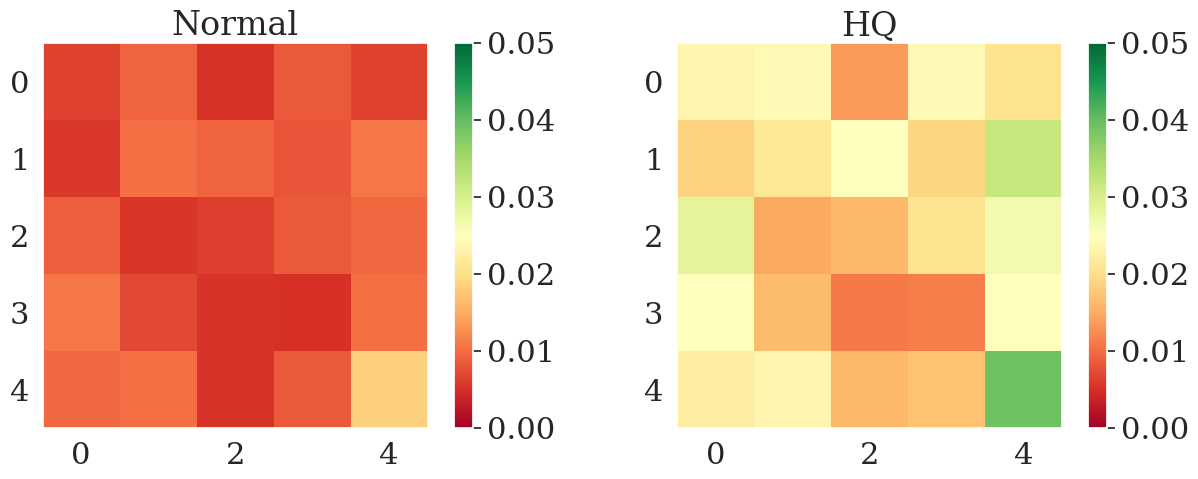

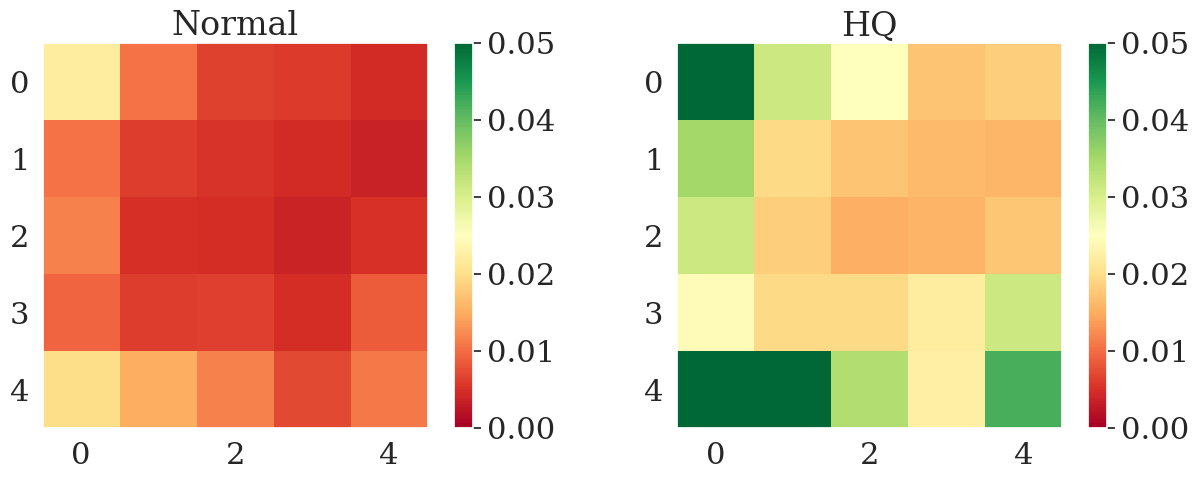

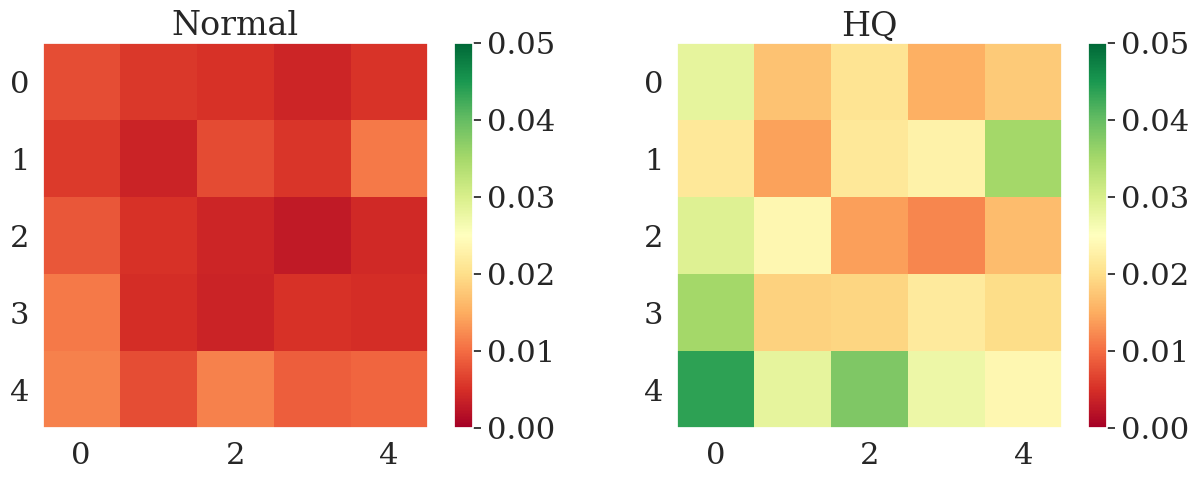

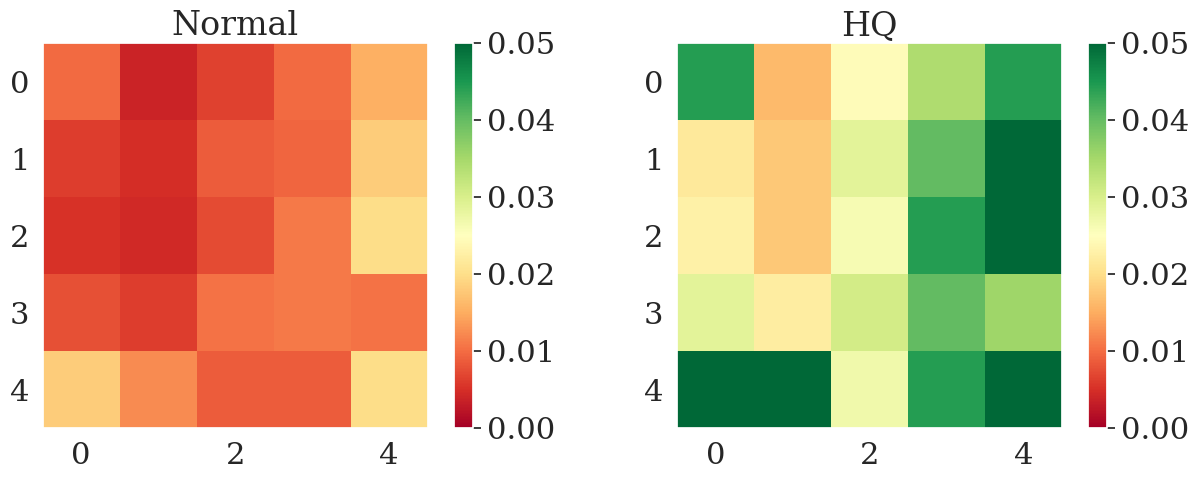

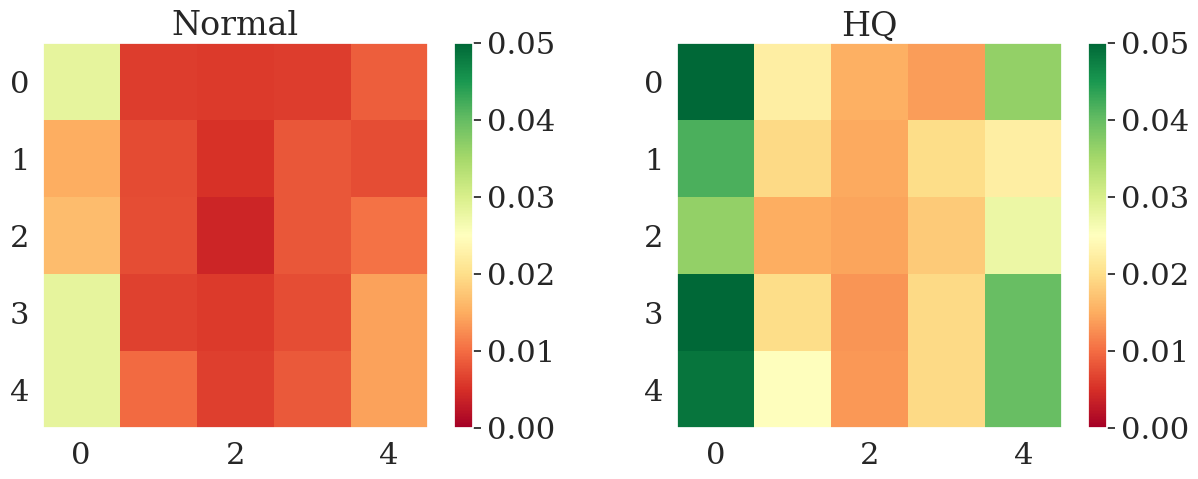

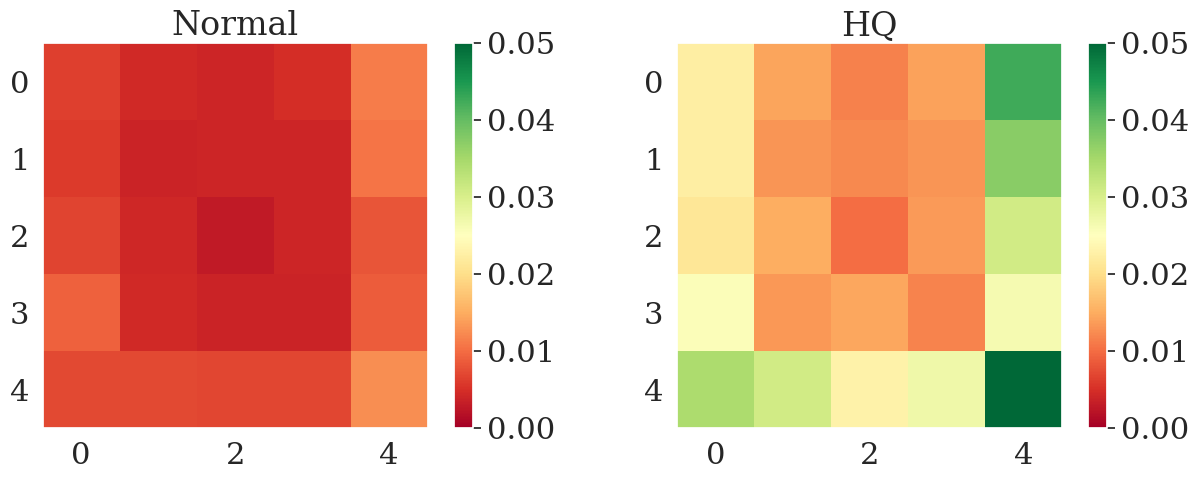

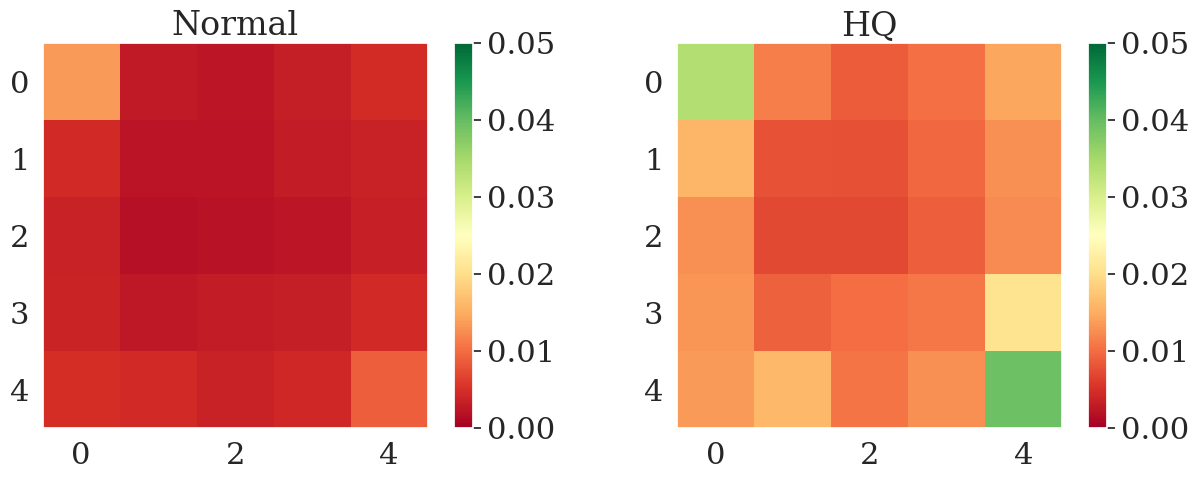

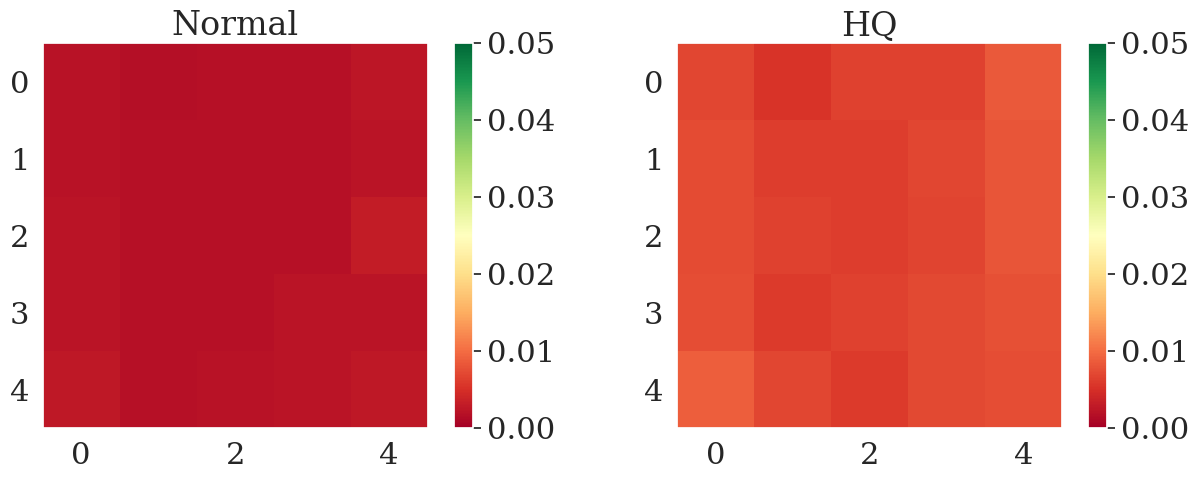

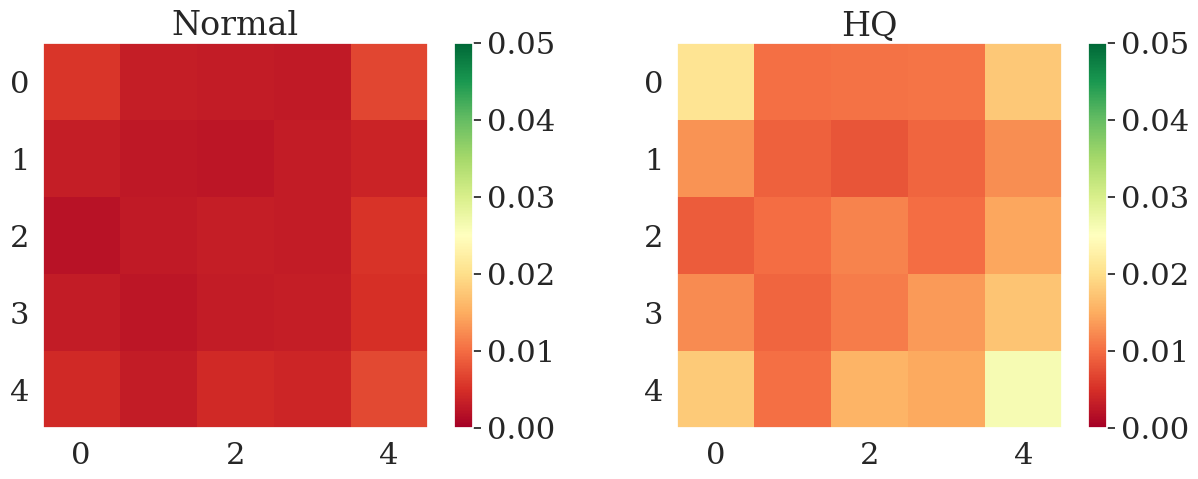

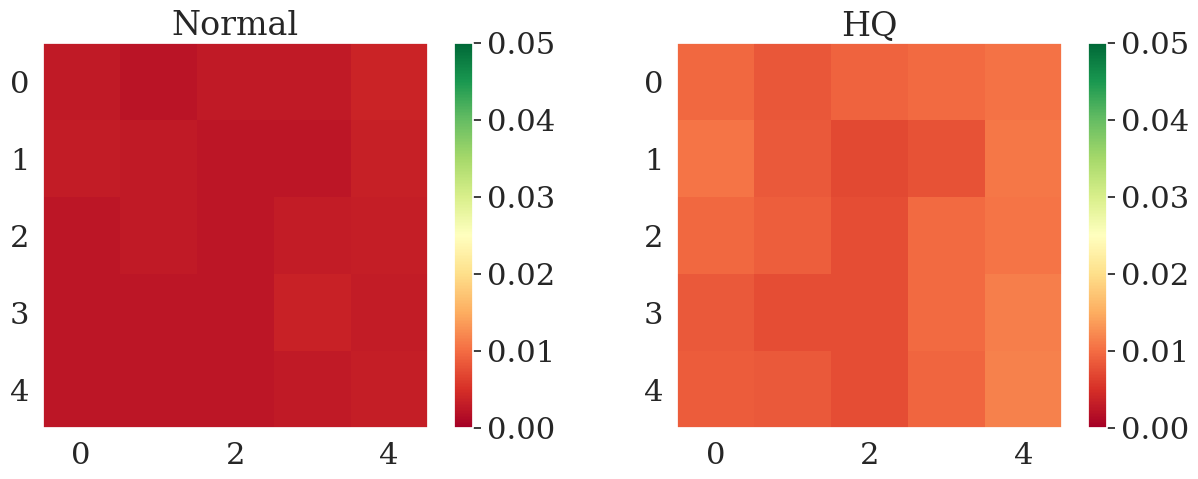

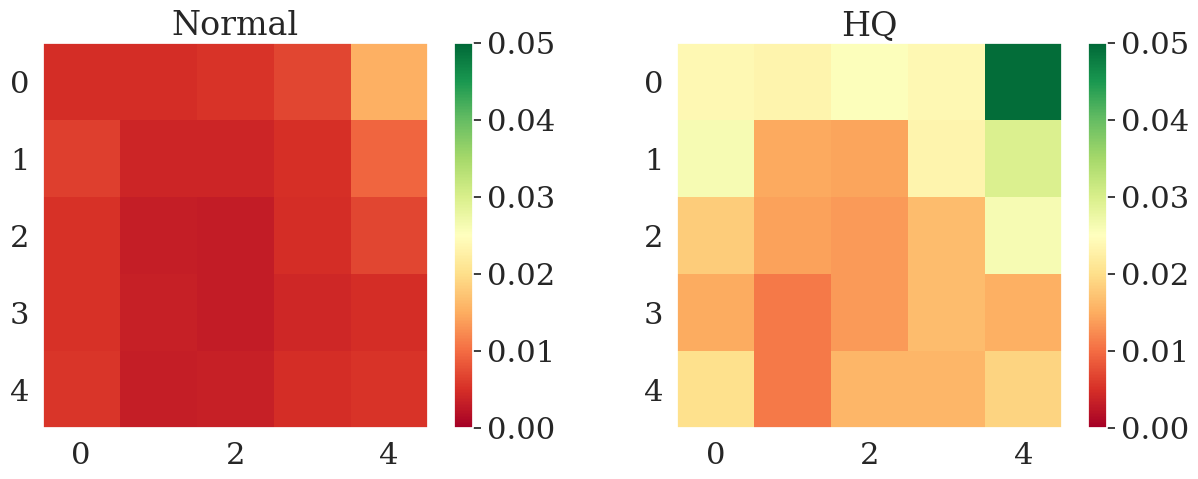

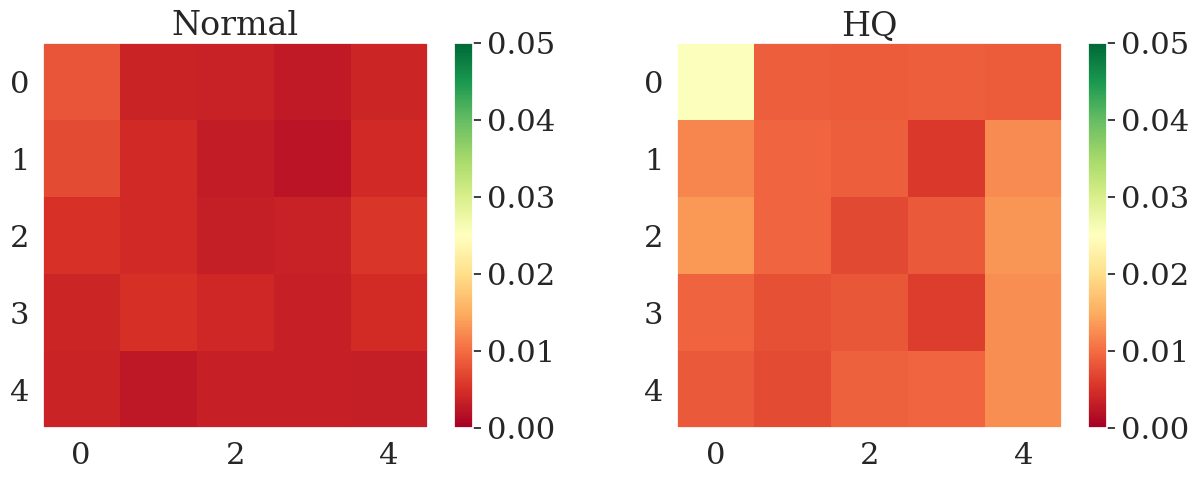

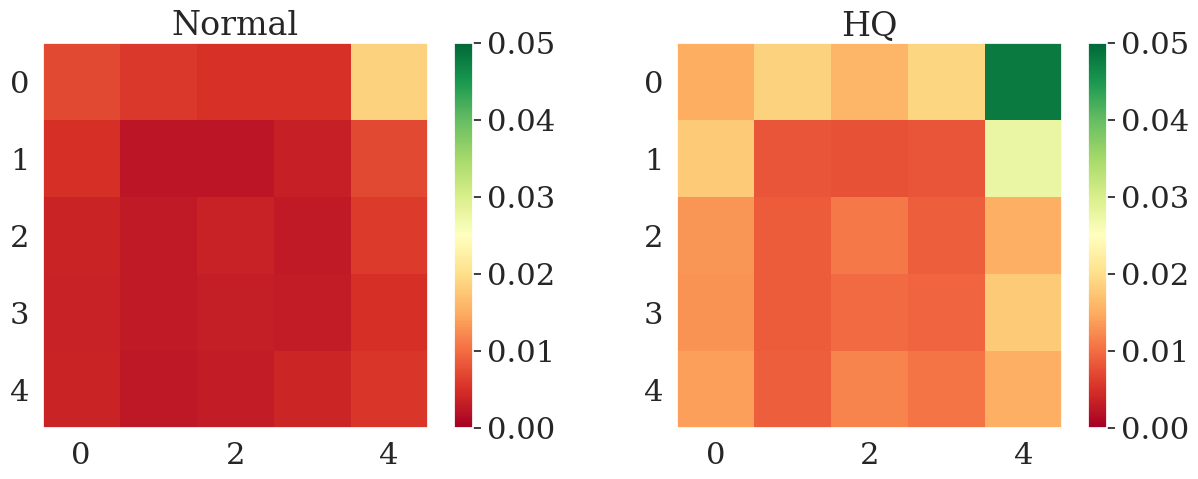

In [28]:
comparison_specimen = list(analytics_hq.keys())
for specimen in comparison_specimen:
    print(f"Specimen: {specimen}")
    print("Deviations (normal, hq): \n")
    print("3D contact: {} to {}".format(100 - analytics[specimen]["mask_analytics"]["contact_air_Al_percent"],
                                                    100 - analytics_hq[specimen]["mask_analytics"]["contact_air_Al_percent"]))
    
    mean_areas_low = analytics[specimen]["2d_cell_area"]
    mean_areas_high = analytics_hq[specimen]["2d_cell_area"]
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    im = axs[0].imshow(mean_areas_low, cmap="RdYlGn", vmin=0, vmax=0.05)
    axs[0].set_title("Normal")
    fig.colorbar(im, ax=axs[0])

    # im = axs[2].imshow(contact_percent * 100, cmap="RdYlGn", vmin=0, vmax=100)
    im = axs[1].imshow(mean_areas_high, cmap="RdYlGn", vmin=0, vmax=0.05)
    axs[1].set_title("HQ")
    fig.colorbar(im, ax=axs[1])
    
    print("-"*20, "\n")